Importa o modelo a ser fatiado e mapeado

In [1]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/TangranV2/input/stl_models/chavinha90.stl
Second arg: 300.0
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/input/sliced
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -20.832, model zmax = 20, first plane Z = -22.828, number of planes = 23
-Incremental, chavinha90.stl, thickness = 2, #T = 312, #P = 21, #S = 1540, 0.000201s (slicing), 0.000759s (polygon assembling), 0.003785s (total), *K: 4.9359


/bin/bash: /home/matheus/anaconda3/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing image: ../input/sliced/layer_012.pgm


writing image: ../input/sliced/layer_013.pgm


writing image: ../input/sliced/layer_014.pgm


writing image: ../input/sliced/layer_015.pgm


writing image: ../input/sliced/layer_016.pgm


writing image: ../input/sliced/layer_017.pgm


writing image: ../input/sliced/layer_018.pgm


writing image: ../input/sliced/layer_019.pgm


writing image: ../input/sliced/layer_020.pgm


writing out

Paredes Finas

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
#[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
[d_ext, sob_ext_per] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        #c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        c.make_thin_walls(folders, d_ext, sob_ext_per)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 1.5636091232299805
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.001871347427368164
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01910686492919922
Total de [Fase 1: Camada: 0] : 1.5933120250701904
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 1.5378799438476562
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0006082057952880859
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.012143611907958984
Total de [Fase 1: Camada: 1] : 1.5574562549591064
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 1.6017675399780273
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0022597312927246094
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01875591278076172
Total de [Fase 1: Camada: 2] : 1.629

Contornos

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,external_max,internal_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 5
Total de [Criando Lvls] : 1.1230072975158691
Criando os loops
Total de [Criando os loops] : 0.37923240661621094
Criando regiões de influência
Total de [Criando regiões de influência] : 0.059148550033569336
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.7332074642181396
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:622 maior void:0.32852386237513875Bw -> aceito
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:72672 maior void:78.2597114317425Bw -> bloqueado
['Lvl_002', 0, 0] Perdendo total:11852 maior void:5.847946725860155Bw -> bloqueado
['Lvl_003', 0, 0] Perdendo total:11285 maior void:5.700332963374029Bw -> bloqueado
['Lvl_004', 0, 0] Perdendo total:5394 maior void:2.591564927857936Bw -> bloqueado
['Lvl_001', 0, 1] Perdendo total:15883 maior void:8.793562708102108Bw -> bloqueado


Pontes

In [10]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, d_int, sob_int_per] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(folders, n_max, d_int, sob_int_per, len(camadas), sum_prohibited_areas)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.7851467132568359
Criando pontes de Zigzag
Fechou uma ponte OK
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 4.838992118835449
Criando pontes de Crossover
Elemento: ('Reg_000', 'Reg_001') Maior prioridade: 0
Elemento: ('Reg_000', 'Reg_002') Maior prioridade: 1
Total de [Criando pontes de Crossover] : 0.015903472900390625
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.014417409896850586
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.000301361083984375
salvando imagens das regiões
deletado: /L_000/I_000/bridges
Total de [salvando imagens das regiões] : 0.1526486873626709
Total de [Fase 3: Camada: 0] : 5.853631258010864
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.9389908313751221
Criando pontes de Zigzag
Fechou uma ponte OK
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 4.250329971313477
Criando pontes de Cros

Zigzags

In [11]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 3.248438835144043
salvando imagens das regiões
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das regiões] : 0.012215614318847656
Total de [Fase 4: Camada: 0] : 3.3391661643981934
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 2.7286336421966553
salvando imagens das regiões
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das regiões] : 0.011970043182373047
Total de [Fase 4: Camada: 1] : 2.814202308654785
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 4.585022449493408
salvando imagens das regiões
deletado: /L_002/I_000/zigzags
Total de [salvando imagens das regiões] : 0.016942501068115234
Total de [Fase 4: Camada: 2] : 4.679657220840454
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 1.4645545482635498
salvando imagens das regiões
deletado: /L_003

iMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.24251675605773926
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.23358654975891113
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.23264241218566895
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.2382373809814453
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.24396538734436035
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.23860430717468262
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.24088144302368164
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.25521087646484375
Fase 4: Camada: 8


Total de [Fase 4: Camada: 8] : 0.2565419673919678
Fase 4: Camada: 9


Total de [Fase 4: Camada: 9] : 0.4102931022644043


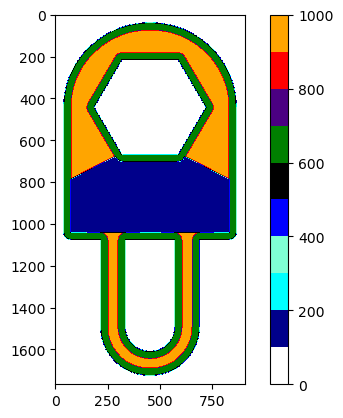

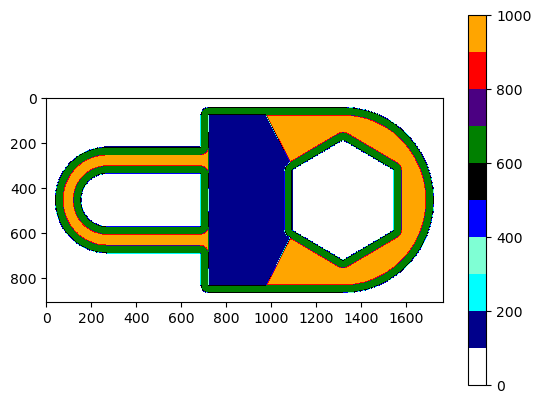

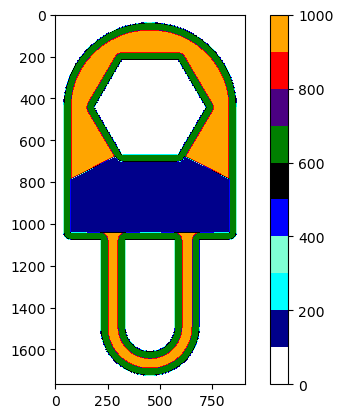

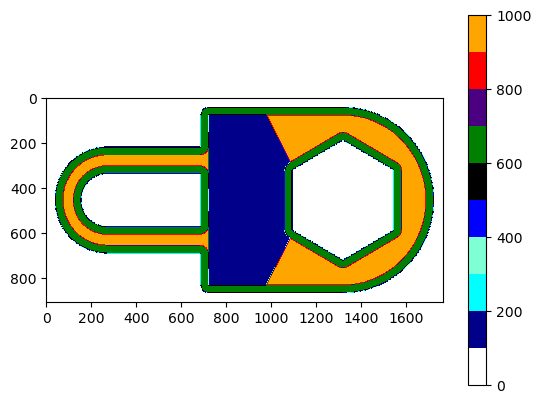

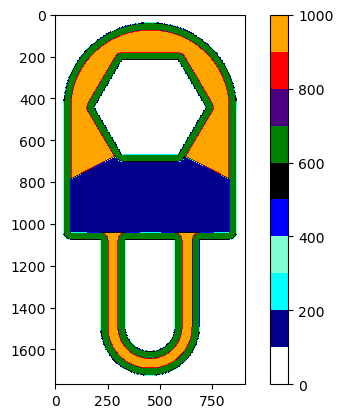

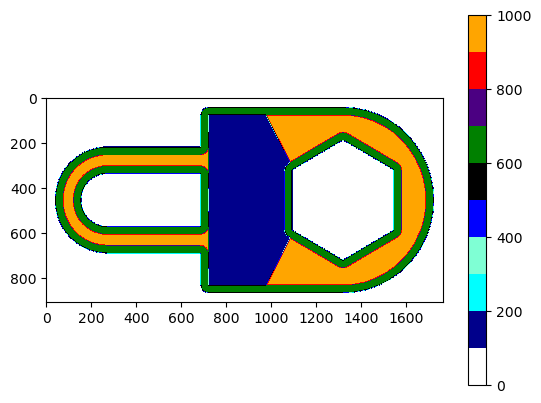

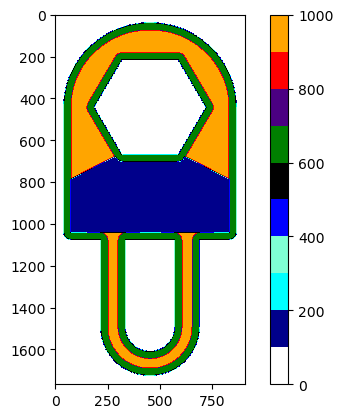

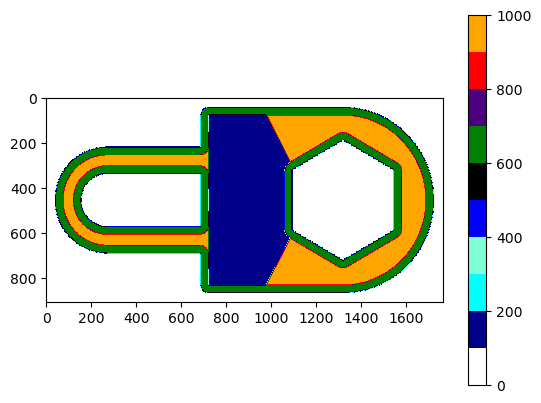

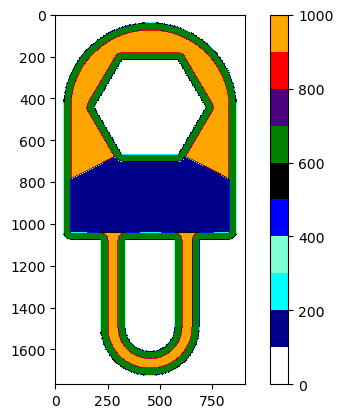

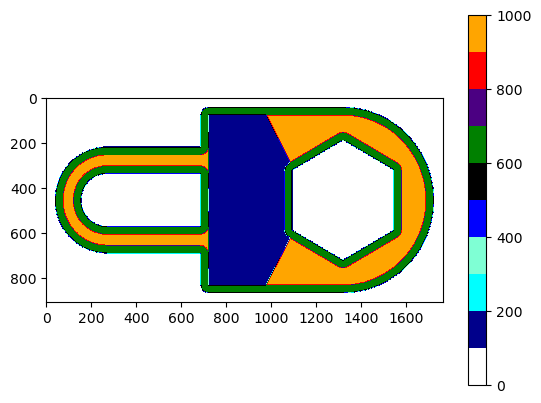

In [12]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [13]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06011033058166504
Total de [Making offset routes] : 1.3939111232757568
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.060721635818481445
Total de [Making offset routes] : 1.3494248390197754
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.060234785079956055
Total de [Making offset routes] : 1.348304033279419
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06251192092895508
Total de [Making offset routes] : 1.4311506748199463
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06524968147277832
Total de [Making offset routes] : 1.4276647567749023
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06253409385681152
Total de [Making offset routes] : 1.4124751091003418
Making offset routes
salvando ima

Rotas de pontes

In [14]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[sob_int_ext_per] = gui.ask_parameters_internal_routes()

with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders, sob_int_ext_per)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00010848045349121094
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 2.47955322265625e-05
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 5.520164728164673
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07848906517028809
Total de [Camada: L_000] : 5.770085334777832
Camada: L_001
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00018644332885742188
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 2.384185791015625e-05
Making Crossover bridges routes
Total de [Making Crossover bridges routes] : 5.540555953979492
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.07706022262573242
Total de [Camada: L_001] : 5.767235517501831
Camada: L_002
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.0001819133758544922
Making Zigzag br

Rotas de Ziguezague

In [15]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 2.692877769470215
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.09643387794494629
Total de [criando as rotas de zigzag, camada:L_000] : 3.0184743404388428
salvando imagens das rotas
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das rotas] : 0.02850508689880371
Criando os grafos de regiões
Total de [Criando os grafos de regiões] : 0.001024007797241211
Conectando regiões de zigzag
Total de [Conectando regiões de zigzag] : 0.0008823871612548828
salvando grafos
Total de [salvando grafos] : 0.05927872657775879
Total de [Making zigzag routes] : 3.232146739959717
Making zigzag routes
criando as rotas de zigzag, camada:L_001
fazendo as tres opções:
Total de [fazendo as tres opções:] : 2.611738443374634
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.07749748229980469
Total de [criando as rotas de zigzag, camada:L_001] : 2.86511254310

WEAVING

In [16]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 0.23578357696533203
Achando os contatos
Total de [Achando os contatos] : 1.3212780952453613
criando os weavings
Total de [criando os weavings] : 0.8076448440551758
Total de [gerando preenchimentos oscilatórios] : 3.16752028465271
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.0711827278137207
Total de [Fase 5 b] : 3.239069938659668
Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 0.14060711860656738
Achando os contatos
Total de [Achando os contatos] : 0.26053452491760254
criando os weavings
Total de [criando os weavings] : 0.16394853591918945
Total de [gerando preenchimentos oscilatórios] : 1.321422815322876
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.06928443908691406
Total de [Fase 5 b] : 1.3909883499145508
Fase 5 b
gerando pree

Rotas de Thin Walls

In [17]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.024549484252929688
salvando imagens das rotas
Total de [salvando imagens das rotas] : 3.337860107421875e-06
Total de [Making thin walls routes] : 0.02476334571838379
Total de [Fase 5] : 0.02484130859375
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.022589921951293945
salvando imagens das rotas
Total de [salvando imagens das rotas] : 4.291534423828125e-06
Total de [Making thin walls routes] : 0.022777557373046875
Total de [Fase 5] : 0.022788047790527344
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.024035215377807617
salvando imagens das rotas
Total de [salvando imagens das rotas] : 3.814697265625e-06
Total de [Making thin walls routes] : 0.024194955825805664
Total de [Fase 5] : 0.024202585220336914
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.021190404891967773
salvando imagens das rotas
Total de [salv

Encontrando o lugar onde será o começo da trilha de cada ilha

In [18]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0009615421295166016
Total de [Encontrando ponto de união ext-int] : 0.18660330772399902
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0011005401611328125
Total de [Encontrando ponto de união ext-int] : 0.1559128761291504
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0009617805480957031
Total de [Encontrando ponto de união ext-int] : 0.1846933364868164
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0009930133819580078
Total de [Encontrando ponto de união ext-int] : 0.15850400924682617
Encontrando ponto de união ext-int
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0010356903076171875
Total de [Encontrando ponto de união ext-int] : 0.1877298355102539
Encontrando ponto de união ext-int
salvando

Unificando rotas EXTERNAS nas camadas

In [19]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.126007080078125
Conectando pontes de Crossover
salto:  [662, 612]
salto:  [1072, 585]
Total de [Conectando pontes de Crossover] : 1.0514168739318848
Total de [Conectando rotas externas] : 1.4152185916900635
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.08364224433898926
Total de [Fase 6] : 1.499190330505371
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.12592697143554688
Conectando pontes de Crossover
salto:  [612, 1105]
salto:  [321, 694]
Total de [Conectando pontes de Crossover] : 1.1191306114196777
Total de [Conectando rotas externas] : 1.4769694805145264
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0786285400390625
Total de [Fase 6] : 1.5557889938354492
Fase 6
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.12438654899597168
Cone

Unificando rotas INTERNAS nas camadas

In [20]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 1.0122363567352295
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0027577877044677734
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0675969123840332
Total de [Fase 7] : 1.3457274436950684
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.9748799800872803
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0018949508666992188
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.06386899948120117
Total de [Fase 7] : 1.3056223392486572
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.9938125610351562
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0019807815551757812
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0639650821685791
Total de [Fase 7] : 1.329333782196045
Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] :

Unindo rotas de thin walls

In [21]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.003108978271484375
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.059587717056274414
Total de [Fase 8] : 0.09393191337585449
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0025606155395507812
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05602765083312988
Total de [Fase 8] : 0.08648157119750977
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0026123523712158203
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.057256221771240234
Total de [Fase 8] : 0.08706283569335938
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.003637075424194336
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.05501294136047363
Total de [Fase 8] : 0.08312249183654785
Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.001680612564086914
salvando imagens das ro

Unindo todas as rotas

In [22]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.02203965187072754
Conectando todas as partes
Total de [Conectando todas as partes] : 0.01308751106262207
salvando imagens das rotas
[[65, 531], [65, 529], [64, 528], [64, 523], [63, 522], [63, 518], [62, 517], [62, 513], [61, 512], [61, 507], [60, 506], [60, 494], [59, 493], [59, 481], [58, 480], [58, 467], [57, 466], [57, 440], [58, 439], [58, 427], [59, 426], [59, 413], [60, 412], [60, 400], [61, 399], [61, 394], [62, 393], [62, 389], [63, 388], [63, 384], [64, 383], [64, 378], [65, 377], [65, 373], [66, 372], [66, 368], [67, 367], [67, 362], [68, 361], [68, 357], [69, 356], [69, 352], [70, 351], [70, 348], [71, 347], [71, 345], [72, 344], [72, 342], [73, 341], [73, 339], [74, 338], [74, 336], [75, 335], [75, 333], [76, 332], [76, 330], [77, 329], [77, 327], [78, 326], [78, 324], [79, 323], [79, 321], [80, 320], [80, 318], [81, 317], [81, 315], [82, 314], [82, 312], [83, 311], [83, 309], [84, 308], [

Gerando o Código G

In [1]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall, vel_vazio, p_religamento, p_desligamento, p_entre_int_ext, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [41+8+2+(i*1.5) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_vazio,
                               vel_thin_wall, 
                               p_religamento,
                               p_desligamento,
                               p_entre_int_ext,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
nome: L_000/I_000
[[65, 531], [65, 529], [64, 528], [64, 523], [63, 522], [63, 518], [62, 517], [62, 513], [61, 512], [61, 507], [60, 506], [60, 494], [59, 493], [59, 481], [58, 480], [58, 467], [57, 466], [57, 440], [58, 439], [58, 427], [59, 426], [59, 413], [60, 412], [60, 400], [61, 399], [61, 394], [62, 393], [62, 389], [63, 388], [63, 384], [64, 383], [64, 378], [65, 377], [65, 373], [66, 372], [66, 368], [67, 367], [67, 362], [68, 361], [68, 357], [69, 356], [69, 352], [70, 351], [70, 348], [71, 347], [71, 345], [72, 344], [72, 342], [73, 341], [73, 339], [74, 338], [74, 336], [75, 335], [75, 333], [76, 332], [76, 330], [77, 329], [77, 327], [78, 326], [78, 324], [79, 323], [79, 321], [80, 320], [80, 318], [81, 317], [81, 315], [82, 314], [82, 312], [83, 311], [83, 309], [84, 308], [84, 306], [86, 303], [86, 301], [87, 300], [87, 299], [88, 298], [88, 297], [89, 296], [89, 295], [90, 294], [90, 293], [91, 292], [91, 291], [92, 290], [92, 289], [93, 288], [93, 28

In [24]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [25]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [26]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [27]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [28]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)